## Titanic

## Steps
* import libraries
* EDA
* Feature Scaling, Feature Enginnering , Encodeing
* Feature Selection
* Choosing the model - Logistic Regresseion
* Split Data - Cross validation
* Traing The model 
* Test the model
* Performance - Confusion Metrics

### Importing Libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize,StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

### Importing Dataset

In [139]:
df=pd.read_csv('titanic.csv')
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

In [149]:
print(df['Fare'].mean())
print(df['Fare'].median())
print(df['Fare'].mode())

32.204207968574636
14.4542
0    8.05
Name: Fare, dtype: float64


In [140]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Anlaysis

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Target- Survived

In [68]:
df.shape

(891, 12)

#### Checking Null values

In [69]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

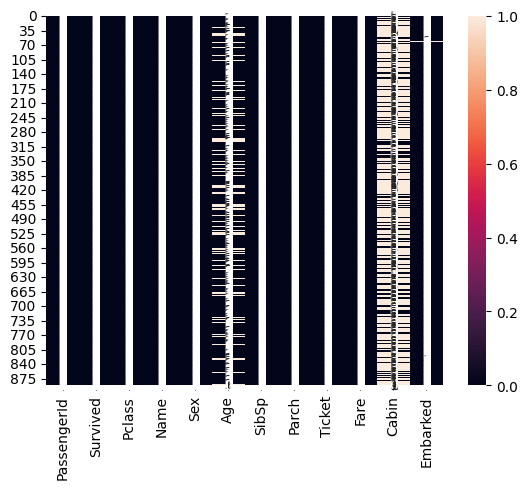

In [70]:
# plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(),annot=True)

* continuous line - there are no null values in feture
* fluctions in line - indicates null values in features

#### Data Cleaing

- Treating Null Values of Age coloumn

In [71]:
print((df['Age'].isnull().sum()/df.shape[0])*100)
df['Age'].isnull().sum()

19.865319865319865


177

- 19 % is data is null in age column

In [72]:
print(df['Age'].mean())
print(df['Age'].median())
print(df['Age'].mode())

29.69911764705882
28.0
0    24.0
Name: Age, dtype: float64


- mean = Pron to Outlires,
- median = middle Value
- mode = Number of Occurance,

<Axes: >

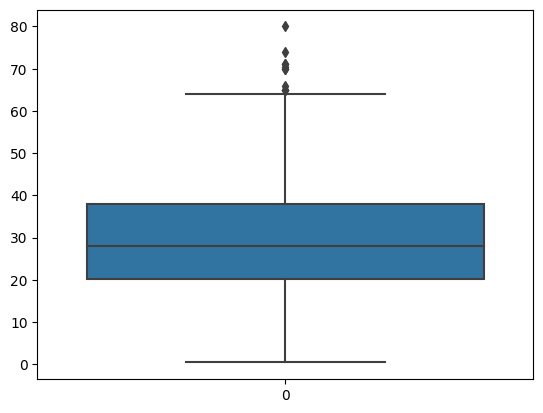

In [73]:
sns.boxplot(df['Age'])

- there are outliers in Age Features 
- Therefore we cannot use mean for fillna 

In [74]:
df['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

- we cannot use mode for fillna because we have 891 datapoint and 24 is olny for 30 datapoints

- therefore we have to use median for fillna for age columns

In [75]:
df['Age'].fillna(value=df['Age'].median(),inplace=True)

- Calculating the Percenatge of null values w.r.t Featrures

In [76]:
print((df['Cabin'].isnull().sum()/df.shape[0])*100)

77.10437710437711


- 77 % is data is null in Cabin Column

In [77]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

- since we have 77% of data null and can't predict the null values since it donot have any correlation with other columns

- we have to drop this column

In [78]:
df.drop('Cabin',axis=1,inplace=True)

In [79]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

- Treating Null Values of Embbraked Column

In [80]:
df['Embarked'].unique()
# S -Southampton
# Q -Queenstown
# C - Cherbourg 

array(['S', 'C', 'Q', nan], dtype=object)

In [81]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


#### Hypothesis Testing
- Null Hypothesis = No Relation
- Alternate Hypothesis = There is Relation Between Pclass,Embarked

In [82]:
df[df['Pclass']==1]['Embarked'].value_counts()

Embarked
S    127
C     85
Q      2
Name: count, dtype: int64

In [83]:
df[df['Pclass']==2]['Embarked'].value_counts()

Embarked
S    164
C     17
Q      3
Name: count, dtype: int64

In [84]:
df[df['Pclass']==3]['Embarked'].value_counts()

Embarked
S    353
Q     72
C     66
Name: count, dtype: int64

- for every class "S" is at the top
- Therefore there NO relation between Pclass and Embarked

### Hypothesis Testing w.r.t Tickets and Fare
- Null Hypothesis = There is no Relationship
- Alternate Hypothesis = There is Relation Between Pclass,Embarked

- Since for the both null values in Embarked the fare price is 80 

In [85]:
df[df['Fare']==80]['Embarked']

61     NaN
829    NaN
Name: Embarked, dtype: object

- Since this 2 datapoints only have fare as 80 we cannot draw any conclusion
- Fare Failed for Relationship

- Cheking For Ticket 

In [86]:
df[df['Ticket']==113572]['Embarked']

Series([], Name: Embarked, dtype: object)

- Ticket number also don't have any relation with Embarked

- Therefore Dropping These 2 Data point

In [87]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

- Dropping the Null rows where embarek is null

In [88]:
df.dropna(inplace=True)

In [89]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [90]:
df.shape

(889, 11)

In [91]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


- Passengerid,name,ticket will not have any impact on survial therefore dropping these columns

In [92]:
df.drop(columns=['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [93]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Data Analysis

* male vs Female Count

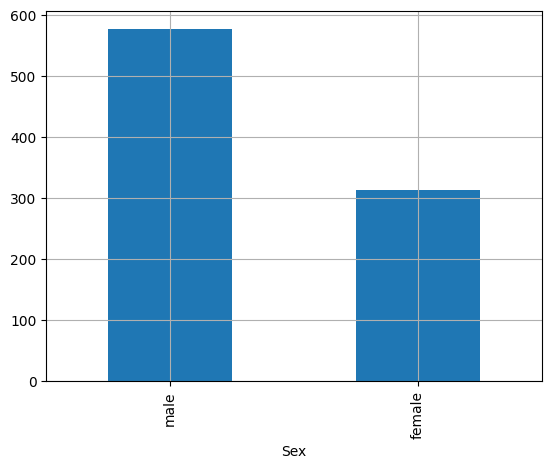

In [94]:
df['Sex'].value_counts().plot.bar()
plt.grid()

- more male were present on the ship

* Survided vs not_Survied

<Axes: xlabel='Survived'>

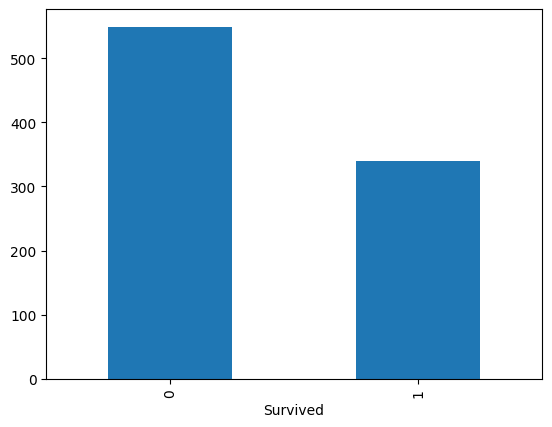

In [95]:
df['Survived'].value_counts().plot.bar()

- Majority of People did not survied

* Graph to find out the survival & non-surviavl rate w.rt. Sex

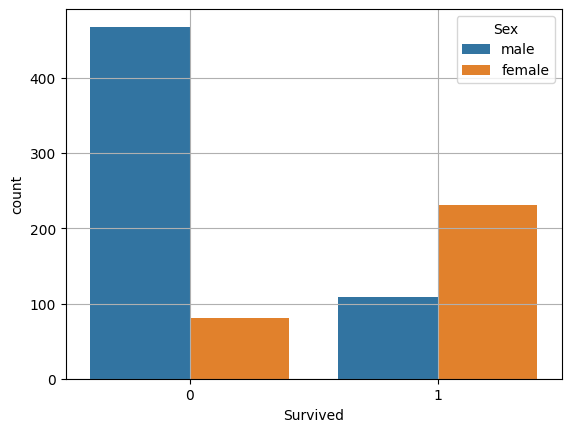

In [96]:
sns.countplot(x='Survived',data=df,hue='Sex')
plt.grid()

- Maximum Male did not Survied
- More number of Female have Survied

* graph to find out the strength of pclass

<Axes: xlabel='Pclass'>

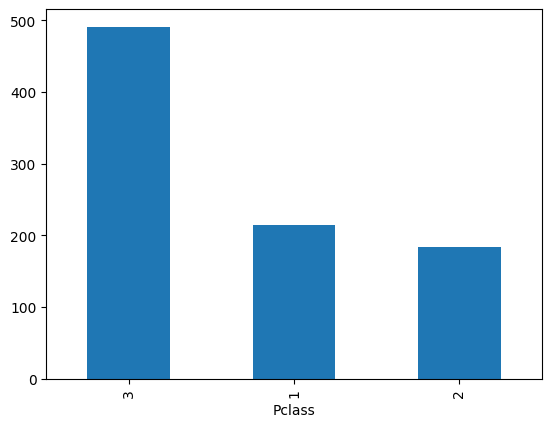

In [97]:
df['Pclass'].value_counts().plot.bar()

* 3rd Class have maximum number of people

* Graph to find out the survival & non-surviavl rate w.rt. Pclass

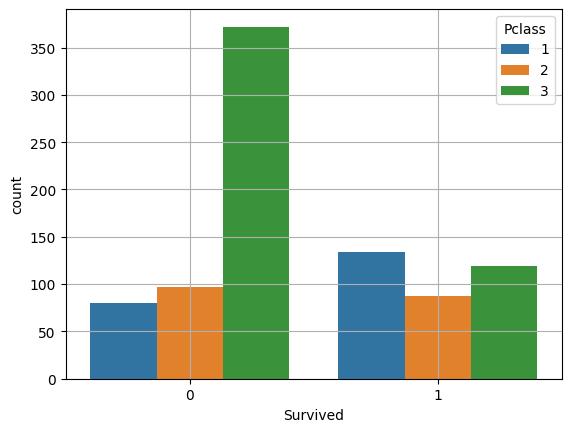

In [98]:
sns.countplot(x='Survived',data=df,hue='Pclass')
plt.grid()

- majority of 3rd Class people have not Survied

- Graph to find males and females in each class(Pclass)

<Axes: xlabel='Pclass', ylabel='count'>

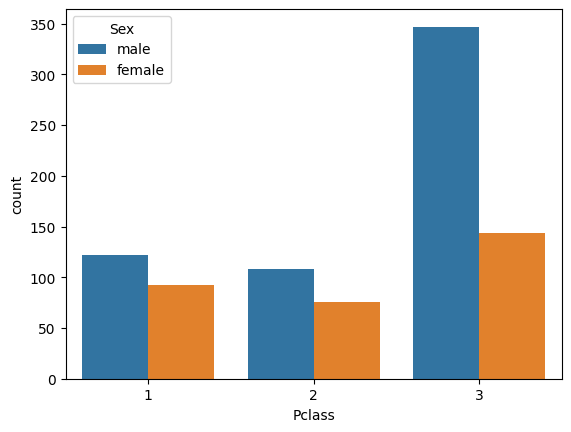

In [99]:
sns.countplot(data=df,x='Pclass',hue='Sex')

- 3rd class Have the most Number of Males and females
- following the 1st  class

In [100]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#### Feature Encoding

* we will Use label Encoder for Sex as it is Nominal Value and there is no order

In [101]:
enc=LabelEncoder()

In [102]:
df['Sex']=enc.fit_transform(df['Sex'])

* using on hot encoding for Embarked column since these are nominal Value
* also we can delete one of the column after one hot encoding with out changing the data which is not possibel with label encoding as there are 3 categories

In [103]:
df=pd.get_dummies(columns=['Embarked'],data=df,dtype=int)

* droping Embarked_C column

In [104]:
df.drop("Embarked_C",axis=1,inplace=True)

* changing the data type of age coloumn

In [105]:
df['Age']=df['Age'].astype(int)

- Roundinoff Fare upto 2 decimal places

In [106]:
df['Fare']=round(df['Fare'],2)

In [107]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22,1,0,7.25,0,1
1,1,1,0,38,1,0,71.28,0,0
2,1,3,0,26,0,0,7.92,0,1
3,1,1,0,35,1,0,53.10,0,1
4,0,3,1,35,0,0,8.05,0,1


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Sex         889 non-null    int32  
 3   Age         889 non-null    int32  
 4   SibSp       889 non-null    int64  
 5   Parch       889 non-null    int64  
 6   Fare        889 non-null    float64
 7   Embarked_Q  889 non-null    int32  
 8   Embarked_S  889 non-null    int32  
dtypes: float64(1), int32(4), int64(4)
memory usage: 55.6 KB


<Axes: >

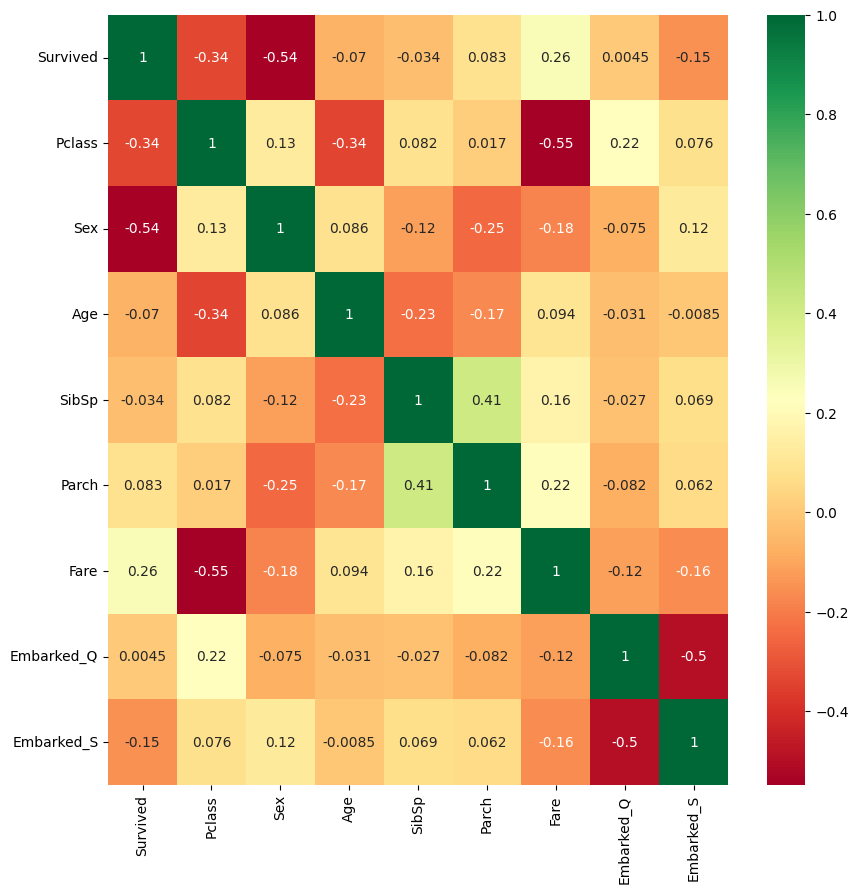

In [109]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

* Pclass and Sex are most Correlated with Survaival
* PClass and Fare are also correlated 

c:\Users\phing\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


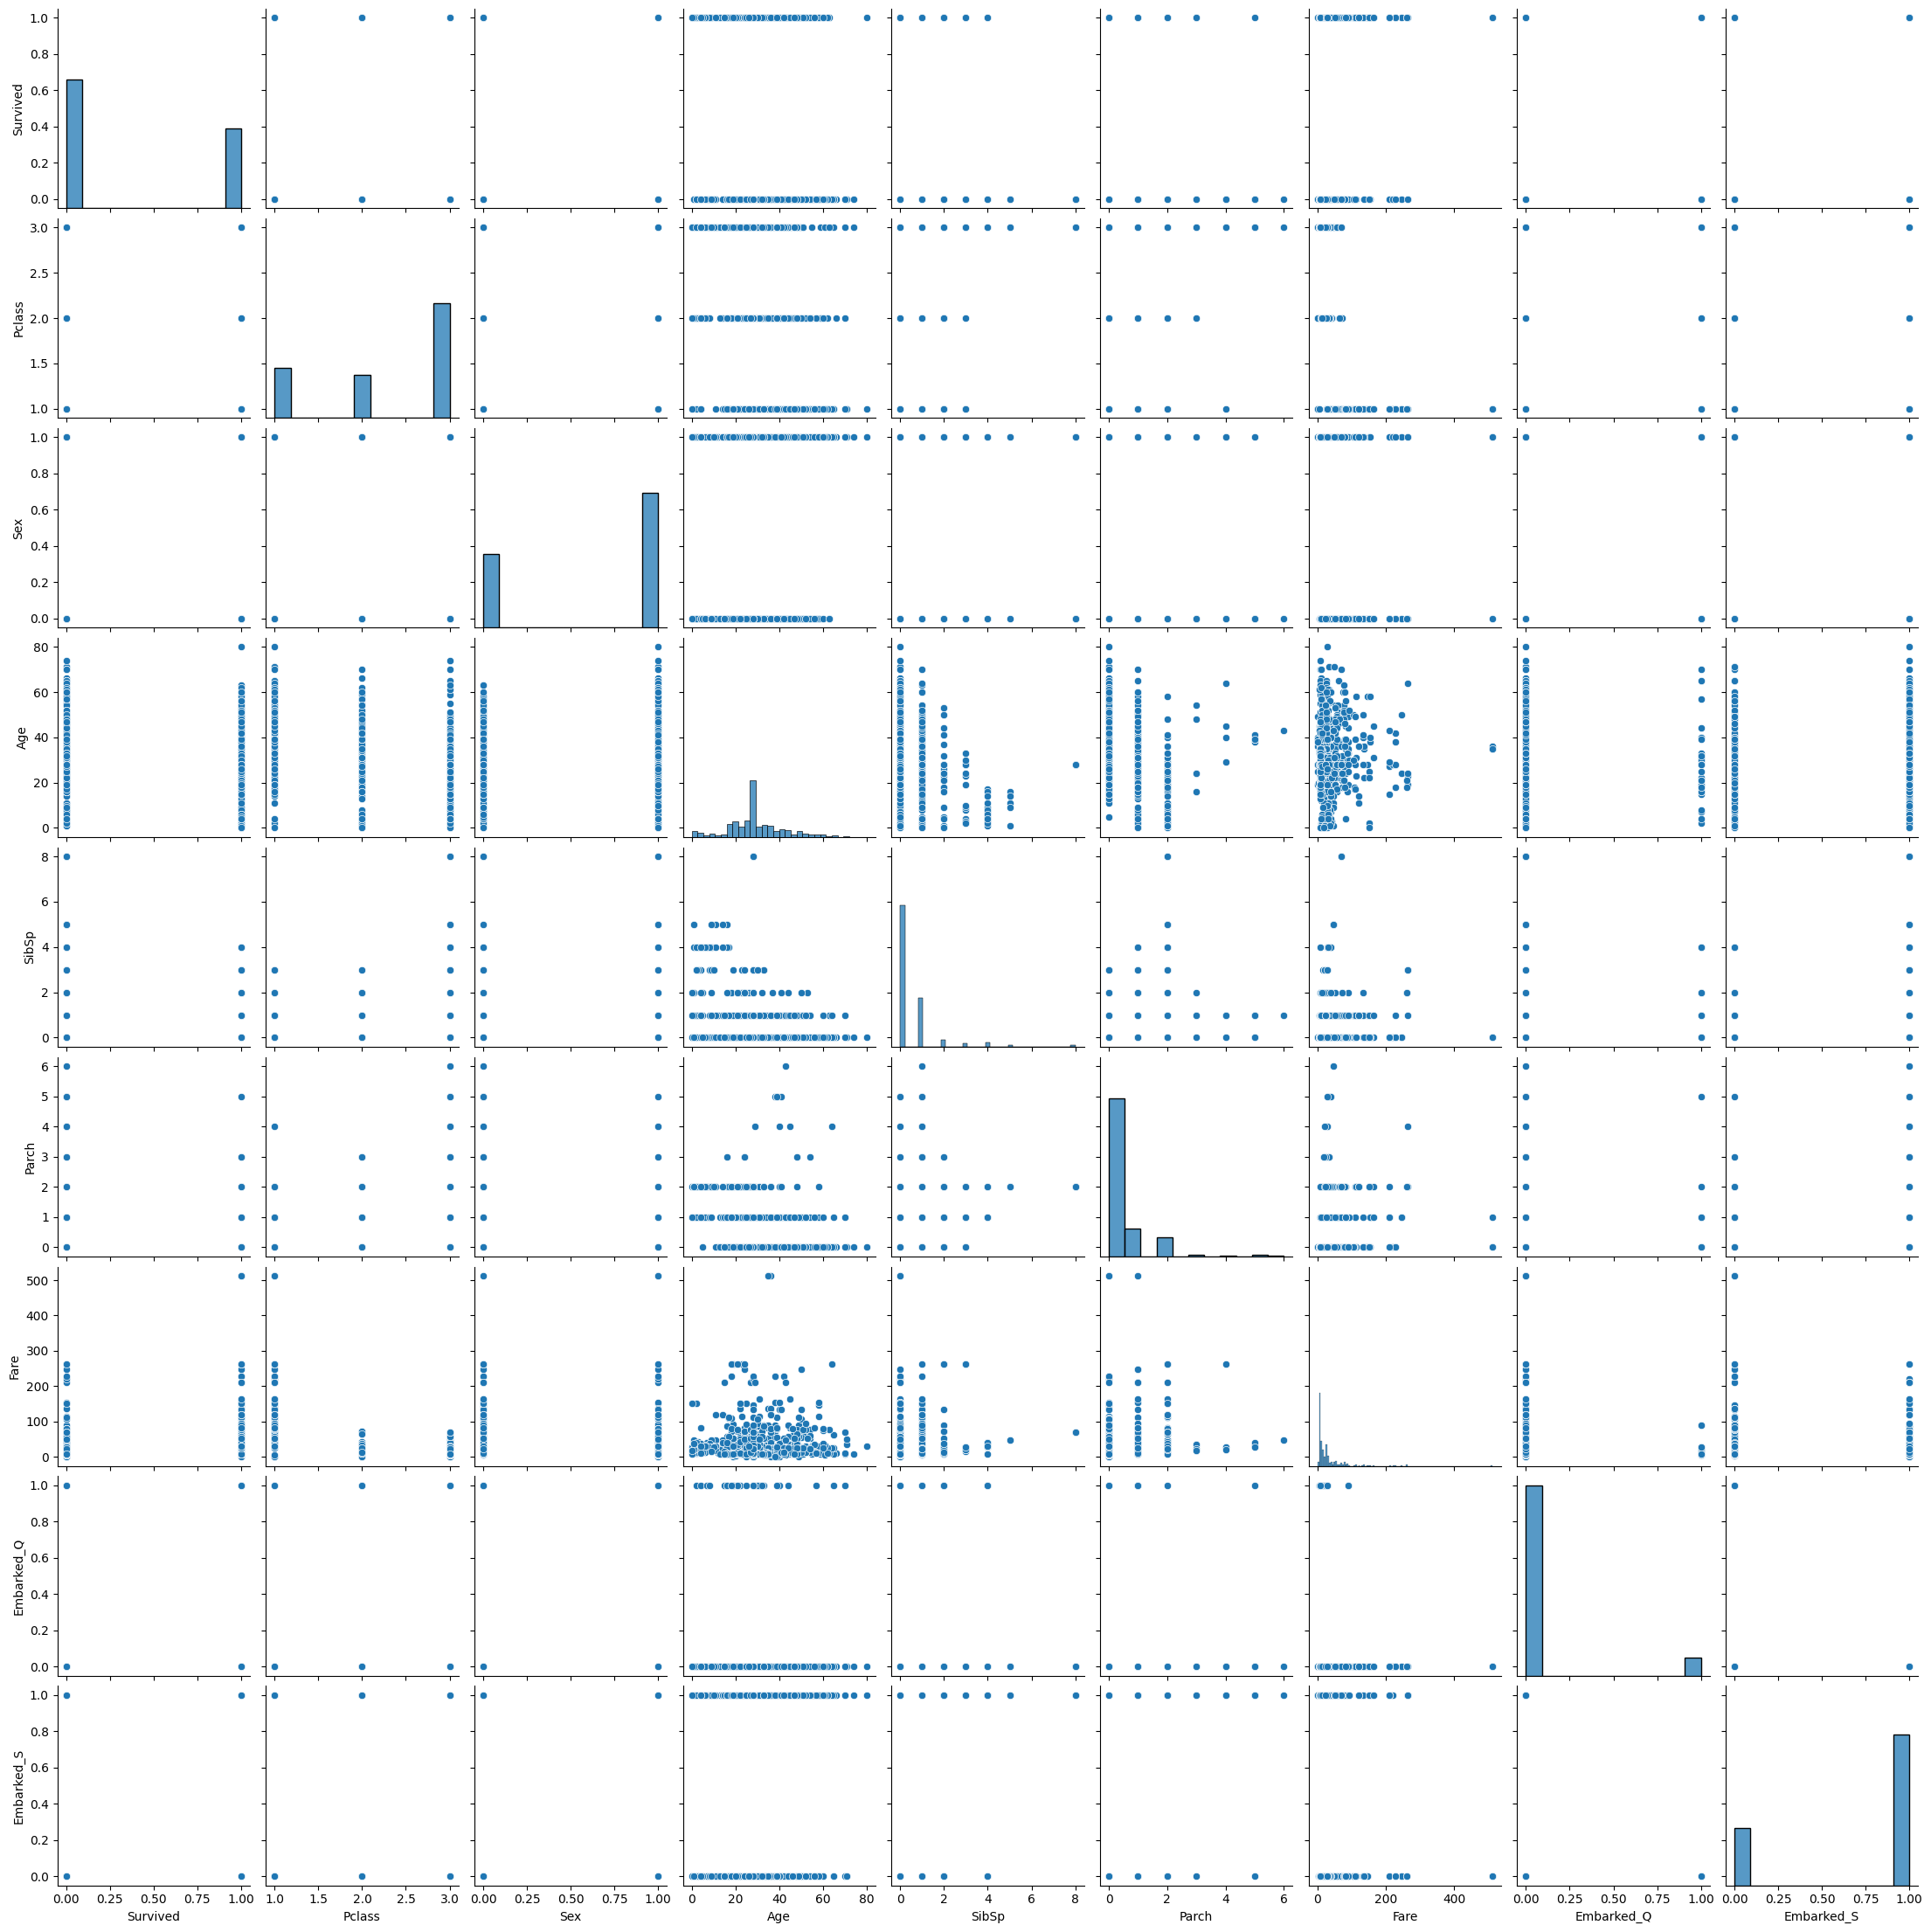

In [110]:
sns.pairplot(df)

In [111]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22,1,0,7.25,0,1
1,1,1,0,38,1,0,71.28,0,0
2,1,3,0,26,0,0,7.92,0,1
3,1,1,0,35,1,0,53.10,0,1
4,0,3,1,35,0,0,8.05,0,1


### seperating the target variable

In [112]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

### Feature importance / Feature Selection

In [113]:
feet=ExtraTreesClassifier()

In [114]:
feet.fit(x,y)

ExtraTreesClassifier()

<Axes: >

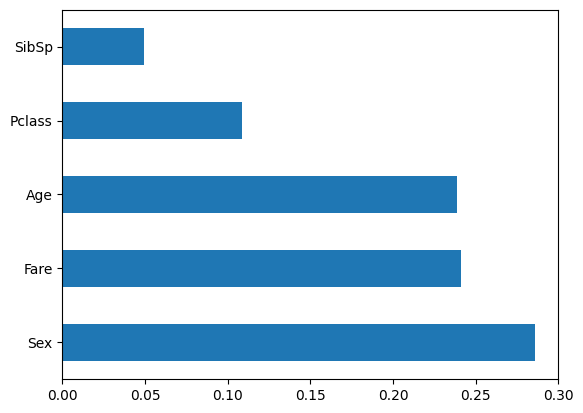

In [115]:
imp=pd.Series(feet.feature_importances_,index=x.columns)
imp.nlargest(5).plot(kind='barh')

- Taking 5 most important Features for Training Model

In [116]:
x=x[['SibSp','Pclass','Age','Fare','Sex']]
y=df.iloc[:,0]

### Splitting data using Cross Validation

In [141]:
skf=StratifiedKFold(n_splits=5)

In [142]:
for train_index,test_index in skf.split(x,y):
    x_train,x_test=x.iloc[train_index],x.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]

In [119]:
x_train.shape,x_test.shape

((712, 5), (177, 5))

In [120]:
y_train.shape,y_test.shape

((712,), (177,))

### Choosing and Training the model

In [132]:
from sklearn.metrics import accuracy_score,classification_report

models={
    'LogisticRegression':LogisticRegression(),
    'DecisionTreeClassifer':DecisionTreeClassifier(),
    'RandomForestClassifer':RandomForestClassifier()
}

Accuracy={}
for i in models:
    model=models[i]
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    pred=pd.DataFrame({
        "actual_value":y_test,
        "predicted_value":y_pred
    })
    print(i)
    print(f'{pred.head()}')
    print("\nclassification_report")
    print(classification_report(y_test,y_pred))
    print(f'accurracy Score = {accuracy_score(y_test,y_pred)*100}')
    print("-----------------------------------------------------------")
    Accuracy[i]=accuracy_score(y_test,y_pred)*100

LogisticRegression
     actual_value  predicted_value
706             1                1
707             1                0
708             1                1
709             1                0
710             1                1

classification_report
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       109
           1       0.76      0.74      0.75        68

    accuracy                           0.81       177
   macro avg       0.80      0.79      0.80       177
weighted avg       0.81      0.81      0.81       177

accurracy Score = 80.7909604519774
-----------------------------------------------------------
DecisionTreeClassifer
     actual_value  predicted_value
706             1                1
707             1                1
708             1                0
709             1                1
710             1                1

classification_report
              precision    recall  f1-score   support

           0    

In [133]:
Accuracy

{'LogisticRegression': 80.7909604519774,
 'DecisionTreeClassifer': 83.05084745762711,
 'RandomForestClassifer': 84.7457627118644}

- RandomForest has Maximum Accuracy 

In [134]:
model=RandomForestClassifier()

In [136]:
test=pd.read_csv('test.csv')

In [138]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64